# DS400: Assignment 5 (Python)

##### Tingyu Lin (Student ID: 5638679)


In [1]:
import requests
import numpy as np
import pandas as pd
import time

In [2]:
# hyperlink: https://github.com/ltyita/Python_Assign05.git

In [8]:
# Ex6 source API key from another script
with open("ticket_APIkey.py") as script:
    exec(script.readline())

### Exercise 7

In [11]:
from IPython.display import Markdown as md

# Exercise (7)
# first GET request that searches for event venues in Germany
response = requests.get("https://app.ticketmaster.com/discovery/v2/venues.json?",
                        params = {"countryCode": "DE", "apikey" : api_key})

# extract content
DE_content = response.json()


# number of page and observation
n = DE_content['page']
n


{'size': 20, 'totalElements': 4750, 'totalPages': 238, 'number': 0}

In [13]:
md(f'From data frame, it suggests that each page contains 20 observations,\
and there are {n["totalElements"]} events in Germany, which make them {n["totalPages"]}-page long. And we are currently at page 0.')


From data frame, it suggests that each page contains 20 observations,and there are 4750 events in Germany, which make them 238-page long. And we are currently at page 0.

### Exercise 8

In [15]:
# Exercise (8)
# make the first 20 obs as a data frame that contains name, the city, the postalCode and address, 
# as well as the url and the longitude and latitude. 

# create an empty data frame dim: 20X7
de_venues = pd.DataFrame(index = range(20), columns = range(7))

# assign col. names
de_venues.columns = ["name", "city", "postalCode", "address", "url",
                     "longitude", "latitude"]


for i in range(0, 20):
    try:
        de_name = DE_content["_embedded"]["venues"][i]["name"]
    except KeyError:
        de_name = np.nan
        
    try:
        de_city = DE_content["_embedded"]["venues"][i]["city"]["name"]
    except KeyError:
        de_city = np.nan
    
    try:
        de_postalCode = DE_content["_embedded"]["venues"][i]["postalCode"]
    except KeyError:
        de_postalCode = np.nan
    
    try:
        de_address = DE_content["_embedded"]["venues"][i]["address"]["line1"]
    except KeyError:
        de_address = np.nan
    
    try:
        de_url = DE_content["_embedded"]["venues"][i]["url"]
    except KeyError:
        de_url = np.nan
    
    try:
        de_longitude = DE_content["_embedded"]["venues"][i]["location"]["longitude"]
    except KeyError:
        de_longitude = np.nan
    
    try:
        de_latitude = DE_content["_embedded"]["venues"][i]["location"]["latitude"]
    except KeyError:
        de_latitude = np.nan
    
    de_venues.iloc[i,:] = [de_name, de_city, de_postalCode, de_address,
                           de_url, de_longitude, de_latitude]   


de_venues

,name,city,postalCode,address,url,longitude,latitude
0,Grosse Freiheit 36,Hamburg,22767,Grosse Freiheit 36,http://www.ticketmaster.de/venue/287636,9.957905,53.551187
1,Gruenspan,Hamburg,22767,Grosse Freiheit 58,http://www.ticketmaster.de/venue/287155,9.958075,53.551885
2,Huxleys Neue Welt,Berlin,10967,Hasenheide 107 – 113,http://www.ticketmaster.de/venue/286842,13.42138,52.486391
3,Virtual Event,Worldwide,NaN,NaN,https://www.ticketmaster.de/venue/virtuelles-e...,10.0,50.0
4,Mojo Club,Hamburg,20359,Reeperbahn 1,https://www.ticketmaster.de/venue/mojo-club-ha...,9.64719,53.75287
5,Ev. St. Jacobi Kirche,Sangerhausen,06526,Marktplatz,http://www.ticketmaster.de/venue/290061,NaN,NaN
6,Evangelische Kirche,Senden,48308,Steverstrasse 5,http://www.ticketmaster.de/venue/290066,NaN,NaN
7,HDI Arena,Hannover,NaN,Robert-Enke-Straße 1,http://www.ticketmaster.de/venue/461692,9.73371,52.361993
8,Arsenal,Berlin,10785,Potsdamer Strasse 2,http://www.ticketmaster.de/venue/290646,NaN,NaN
9,Freilichtbühne Heppenheim,Heppenheim,64646,Oberhalb der Stadt,http://www.ticketmaster.de/venue/290639,NaN,NaN


### Exercise 9

In [29]:
# create function

# Exercise (9) iterate every page


def venue_page(page, country_name):
    time.sleep(.2)
    
    # get request
    de_response = requests.get("https://app.ticketmaster.com/discovery/v2/venues.json?",
                            params = {"page" : page, 
                                      "countryCode": country_name, 
                                      "apikey" : api_key})

    # extract content
    page_content = de_response.json()
    
    # create an indicator to deal with keyError
    indicator  = True

    while indicator:
        try:
            time.sleep(.2)
            # no. of obs. in each page
            no_obs =len(page_content["_embedded"]["venues"])
            indicator = False
        except KeyError:
            de_response = requests.get("https://app.ticketmaster.com/discovery/v2/venues.json?",
                                    params = {"page" : page, 
                                              "countryCode": country_name, 
                                              "apikey" : api_key})
            page_content = de_response.json()
            no_obs =len(page_content["_embedded"]["venues"])
            indicator = True
    
    
    # loop through each obs.
    Germany_df = pd.DataFrame()
    for k in range(0, no_obs):
        try:
            de_name = page_content["_embedded"]["venues"][k]["name"]
        except KeyError:
            de_name = np.nan
            
        try:
            de_city = page_content["_embedded"]["venues"][k]["city"]["name"]
        except KeyError:
            de_city = np.nan
        
        try:
            de_postalCode = page_content["_embedded"]["venues"][k]["postalCode"]
        except KeyError:
            de_postalCode = np.nan
        
        try:
            de_address = page_content["_embedded"]["venues"][k]["address"]["line1"]
        except KeyError:
            de_address = np.nan
        
        try:
            de_url = page_content["_embedded"]["venues"][k]["url"]
        except KeyError:
            de_url = np.nan
        
        try:
            de_longitude = page_content["_embedded"]["venues"][k]["location"]["longitude"]
        except KeyError:
            de_longitude = np.nan
        
        try:
            de_latitude = page_content["_embedded"]["venues"][k]["location"]["latitude"]
        except KeyError:
            de_latitude = np.nan
        
        Germany_venues = pd.DataFrame([de_name, de_city, de_postalCode, de_address,
                                       de_url, de_longitude, de_latitude]).T
        Germany_df = pd.concat([Germany_df, Germany_venues], ignore_index= True)
              
    Germany_df.columns = ["name", "city", "postalCode", "address", "url",
                          "longitude", "latitude"]
        
    return Germany_df
      
        

In [30]:
# ex9 call function
country_de = ["DE"] * n["totalPages"]
test1 = list(map(venue_page, range(0, n["totalPages"]), country_de))

# flaten the list
all_obs = pd.DataFrame()
for x in test1:
    all_obs = pd.concat([all_obs, x], ignore_index= True)




In [31]:
# first 10 obs
DE_head = all_obs.head(10)
print(DE_head)

# shape
all_obs.shape

                        name          city postalCode               address  \
0         Grosse Freiheit 36       Hamburg      22767    Grosse Freiheit 36   
1                  Gruenspan       Hamburg      22767    Grosse Freiheit 58   
2          Huxleys Neue Welt        Berlin      10967  Hasenheide 107 – 113   
3              Virtual Event     Worldwide        NaN                   NaN   
4                  Mojo Club       Hamburg      20359          Reeperbahn 1   
5      Ev. St. Jacobi Kirche  Sangerhausen      06526            Marktplatz   
6        Evangelische Kirche        Senden      48308       Steverstrasse 5   
7                  HDI Arena      Hannover        NaN  Robert-Enke-Straße 1   
8                    Arsenal        Berlin      10785   Potsdamer Strasse 2   
9  Freilichtbühne Heppenheim    Heppenheim      64646    Oberhalb der Stadt   

                                                 url longitude   latitude  
0            http://www.ticketmaster.de/venue/287636  

(4750, 7)

### Exercise 10

In [20]:
# ex10 de map
import geopandas as gpd
import matplotlib.pyplot as plt


<AxesSubplot:>

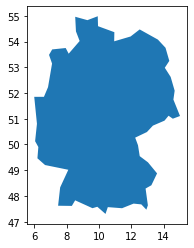

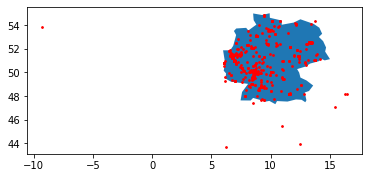

In [32]:
# conver datatype object to float
all_obs['longitude'] = all_obs['longitude'].astype(str).astype(float)
all_obs['latitude'] = all_obs['latitude'].astype(str).astype(float)

# assign nan to 0s.
all_obs.loc[all_obs["longitude"] == 0, "longitude"] = np.nan  
all_obs.loc[all_obs["latitude"] == 0, "latitude"] = np.nan  
    

# get a base map of Germany
map_de = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
map_de = map_de[map_de.name == "Germany"]

# plot the map
map_de.plot()


# add points on the map (with extreme values)
geometry = gpd.points_from_xy(x=all_obs['longitude'], y=all_obs['latitude'])
gdf = gpd.GeoDataFrame(all_obs, geometry=geometry) 
gdf.plot(ax=map_de.plot(), color='red', markersize=3)


### Exercise 11

<AxesSubplot:>

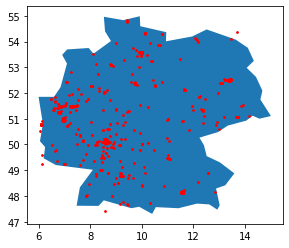

In [33]:
# ex11 add points on the map w/o extreme values
all_obs.loc[(all_obs["latitude"] <= 47.270) | (all_obs["latitude"] >= 55.059), "latitude"] = np.nan
all_obs.loc[(all_obs["longitude"] <= 5.866) | (all_obs["longitude"] >= 15.042), "longitude"] = np.nan


geometry1 = gpd.points_from_xy(x=all_obs['longitude'], y=all_obs['latitude'])
gdf1 = gpd.GeoDataFrame(all_obs, geometry=geometry1) 
gdf1.plot(ax=map_de.plot(), color='red', markersize=3)



### Redo Ex9-11 (Spain)

In [34]:
# Redo ex9-ex11.  

# General info Spain
# first GET request that searches for event venues in Germany
response_ES = requests.get("https://app.ticketmaster.com/discovery/v2/venues.json?",
                        params = {"countryCode": "ES", "apikey" : api_key})

# extract content
ES_content = response_ES.json()


# number of page and observation
n_ES = ES_content['page']

n_ES

{'size': 20, 'totalElements': 3218, 'totalPages': 161, 'number': 0}

In [35]:
md(f'From data frame, it suggests that each page contains 20 observations,\
and there are {n_ES["totalElements"]} events in Spain, which make them {n_ES["totalPages"]}-page long. And we are currently at page 0.')


From data frame, it suggests that each page contains 20 observations,and there are 3218 events in Spain, which make them 161-page long. And we are currently at page 0.

### Redo Exercise 9

In [36]:
# ex9 call function
country_ES = ["ES"] * n_ES["totalPages"]
test_ES = list(map(venue_page, range(0, n_ES["totalPages"]), country_ES))

# flaten the list
ES_obs = pd.DataFrame()
for x in test_ES:
    ES_obs = pd.concat([ES_obs, x], ignore_index= True)


In [37]:
# first 10 obs
ES_head = ES_obs.head(10)
print(ES_head)

# shape
ES_obs.shape

                            name                    city postalCode  \
0                Sala Razzmatazz               Barcelona      08018   
1  Estadio La Cartuja de Sevilla                 Sevilla      41092   
2                       Andén 56                  Burgos      09001   
3                Sala MasterClub                    Vigo      36201   
4                        Zentral          Pamplona/Iruña      31001   
5                     La Riviera                  Madrid      28005   
6               Velodromo Anoeta  Donostia/San Sebastián      20014   
7                Varios Recintos               Barcelona        NaN   
8                 Sala Malatesta  Santiago de Compostela      15705   
9              Sala Razzmatazz 2               Barcelona      08018   

                                   address  \
0                           Almogavers 122   
1                       Isla de la Cartuja   
2        Calle San Pedro y San Felices, 56   
3                            Rúa U

(3218, 7)

### Exercise 10

<AxesSubplot:>

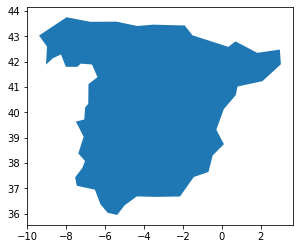

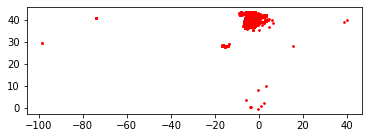

In [38]:
# ex10 Spain map
# get a base map of Spain

map_ES = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
map_ES = map_ES[map_ES.name == "Spain"]
# plot the map
map_ES.plot()

# conver datatype object to float
ES_obs['longitude'] = ES_obs['longitude'].astype(str).astype(float)
ES_obs['latitude'] = ES_obs['latitude'].astype(str).astype(float)

# assign nan to 0s.
ES_obs.loc[ES_obs["longitude"] == 0, "longitude"] = np.nan  
ES_obs.loc[ES_obs["latitude"] == 0, "latitude"] = np.nan  
    

# add points on the map (with extreme values)
geometry_ES = gpd.points_from_xy(x=ES_obs['longitude'], y=ES_obs['latitude'])
gdf_ES = gpd.GeoDataFrame(ES_obs, geometry=geometry_ES) 
gdf_ES.plot(ax=map_ES.plot(), color='red', markersize=3)
